In [2]:
# Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
%matplotlib inline
import scipy.stats as stats

In [5]:
# Make a reference to the books.csv file path
csv_path = "LoanStats_2018Q1.csv"

In [3]:
# pull in all csvs and merge them into a single dataframe
bigdf = pd.concat([pd.read_csv(f, low_memory=False, usecols=['grade','earliest_cr_line','tot_cur_bal','loan_amnt','term','int_rate','installment','emp_length','home_ownership','annual_inc','issue_d','loan_status','pymnt_plan','purpose','title','addr_state','dti','delinq_2yrs','mths_since_last_delinq','open_acc','pub_rec','total_rec_late_fee','recoveries','collection_recovery_fee','mths_since_last_major_derog','chargeoff_within_12_mths','delinq_amnt','mo_sin_old_il_acct','mo_sin_old_rev_tl_op','mo_sin_rcnt_rev_tl_op','mo_sin_rcnt_tl','mort_acc','mths_since_recent_bc','mths_since_recent_bc_dlq','mths_since_recent_inq','mths_since_recent_revol_delinq','pct_tl_nvr_dlq','pub_rec_bankruptcies','tax_liens'
]) for f in glob.glob('data/LoanStats*.csv')], ignore_index=True)

bigdf.dropna(subset=['term', 'issue_d'], inplace=True)
bigdf

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,issue_d,loan_status,...,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,pct_tl_nvr_dlq,pub_rec_bankruptcies,tax_liens
0,30000.0,36 months,7.34%,930.99,A,3 years,OWN,95000.0,Mar-18,Fully Paid,...,13.0,13.0,0.0,19.0,NaN,24.0,10.0,90.0,0.0,0.0
1,34825.0,60 months,12.61%,785.45,C,2 years,MORTGAGE,125000.0,Mar-18,Current,...,14.0,14.0,1.0,14.0,45.0,15.0,45.0,96.3,0.0,0.0
2,2600.0,36 months,7.96%,81.43,A,3 years,MORTGAGE,62000.0,Mar-18,Current,...,19.0,19.0,1.0,45.0,NaN,NaN,NaN,100.0,0.0,0.0
3,20000.0,60 months,9.92%,424.16,B,3 years,MORTGAGE,110000.0,Mar-18,Current,...,8.0,3.0,5.0,8.0,NaN,4.0,NaN,90.9,0.0,0.0
4,17000.0,60 months,20.39%,454.10,D,10+ years,RENT,52000.0,Mar-18,Current,...,19.0,19.0,0.0,19.0,77.0,0.0,77.0,85.7,0.0,0.0
5,5000.0,36 months,20.39%,186.82,D,8 years,RENT,50000.0,Mar-18,Current,...,11.0,11.0,0.0,11.0,NaN,2.0,NaN,77.8,0.0,0.0
6,20000.0,36 months,10.41%,649.21,B,NaN,MORTGAGE,19000.0,Mar-18,Current,...,0.0,0.0,0.0,24.0,NaN,0.0,NaN,100.0,0.0,0.0
7,19200.0,60 months,17.47%,482.04,D,5 years,RENT,36500.0,Mar-18,Current,...,17.0,17.0,0.0,34.0,NaN,NaN,NaN,83.3,0.0,0.0
8,15000.0,36 months,9.92%,483.45,B,2 years,OWN,196000.0,Mar-18,Current,...,4.0,4.0,5.0,11.0,NaN,6.0,NaN,98.0,0.0,0.0
9,6500.0,36 months,6.07%,197.95,A,10+ years,MORTGAGE,50000.0,Mar-18,In Grace Period,...,21.0,21.0,2.0,21.0,NaN,NaN,NaN,93.8,0.0,0.0


In [4]:
debt_column = bigdf[["purpose", "annual_inc", "tot_cur_bal","home_ownership", "int_rate", "grade"]]
debt_column.head(10)  

,purpose,annual_inc,tot_cur_bal,home_ownership,int_rate,grade
0,house,95000.0,12704.0,OWN,7.34%,A
1,credit_card,125000.0,68270.0,MORTGAGE,12.61%,C
2,other,62000.0,241067.0,MORTGAGE,7.96%,A
3,home_improvement,110000.0,365026.0,MORTGAGE,9.92%,B
4,debt_consolidation,52000.0,18039.0,RENT,20.39%,D
5,other,50000.0,19344.0,RENT,20.39%,D
6,debt_consolidation,19000.0,17709.0,MORTGAGE,10.41%,B
7,other,36500.0,13295.0,RENT,17.47%,D
8,debt_consolidation,196000.0,534954.0,OWN,9.92%,B
9,debt_consolidation,50000.0,243513.0,MORTGAGE,6.07%,A


In [5]:
replaceGrades = {
    'A':1
    ,'B':2
    ,'C':3
    ,'D':4
    ,'E':5
    ,'F':6
    ,'G':7
}

In [7]:
bigdf['numericGrade'] = bigdf[['grade']].replace(replaceGrades)
bigdf

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,issue_d,loan_status,...,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,pct_tl_nvr_dlq,pub_rec_bankruptcies,tax_liens,numericGrade
0,30000.0,36 months,7.34%,930.99,A,3 years,OWN,95000.0,Mar-18,Fully Paid,...,13.0,0.0,19.0,NaN,24.0,10.0,90.0,0.0,0.0,1
1,34825.0,60 months,12.61%,785.45,C,2 years,MORTGAGE,125000.0,Mar-18,Current,...,14.0,1.0,14.0,45.0,15.0,45.0,96.3,0.0,0.0,3
2,2600.0,36 months,7.96%,81.43,A,3 years,MORTGAGE,62000.0,Mar-18,Current,...,19.0,1.0,45.0,NaN,NaN,NaN,100.0,0.0,0.0,1
3,20000.0,60 months,9.92%,424.16,B,3 years,MORTGAGE,110000.0,Mar-18,Current,...,3.0,5.0,8.0,NaN,4.0,NaN,90.9,0.0,0.0,2
4,17000.0,60 months,20.39%,454.10,D,10+ years,RENT,52000.0,Mar-18,Current,...,19.0,0.0,19.0,77.0,0.0,77.0,85.7,0.0,0.0,4
5,5000.0,36 months,20.39%,186.82,D,8 years,RENT,50000.0,Mar-18,Current,...,11.0,0.0,11.0,NaN,2.0,NaN,77.8,0.0,0.0,4
6,20000.0,36 months,10.41%,649.21,B,NaN,MORTGAGE,19000.0,Mar-18,Current,...,0.0,0.0,24.0,NaN,0.0,NaN,100.0,0.0,0.0,2
7,19200.0,60 months,17.47%,482.04,D,5 years,RENT,36500.0,Mar-18,Current,...,17.0,0.0,34.0,NaN,NaN,NaN,83.3,0.0,0.0,4
8,15000.0,36 months,9.92%,483.45,B,2 years,OWN,196000.0,Mar-18,Current,...,4.0,5.0,11.0,NaN,6.0,NaN,98.0,0.0,0.0,2
9,6500.0,36 months,6.07%,197.95,A,10+ years,MORTGAGE,50000.0,Mar-18,In Grace Period,...,21.0,2.0,21.0,NaN,NaN,NaN,93.8,0.0,0.0,1


In [8]:
cols = ['int_rate']
debt_column[cols]=debt_column[cols].replace('%','', regex=True).apply(pd.to_numeric, errors='coerce')
debt_column["int_rate"] = debt_column["int_rate"]
debt_column.head()

C:\Users\nnorman\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]
C:\Users\nnorman\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,purpose,annual_inc,tot_cur_bal,home_ownership,int_rate,grade
0,house,95000.0,12704.0,OWN,7.34,A
1,credit_card,125000.0,68270.0,MORTGAGE,12.61,C
2,other,62000.0,241067.0,MORTGAGE,7.96,A
3,home_improvement,110000.0,365026.0,MORTGAGE,9.92,B
4,debt_consolidation,52000.0,18039.0,RENT,20.39,D


In [9]:
replaceGrades

{'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7}

In [10]:
any_home = debt_column.groupby(['home_ownership'])['int_rate'].mean()
any_home
#home_own_y = debt_column.groupby(['home_ownership'])['annual_inc'].mean()
#home_own_y

home_ownership
ANY         12.668730
MORTGAGE    12.343863
OWN         12.757874
RENT        13.192447
Name: int_rate, dtype: float64

In [11]:
print(debt_column["int_rate"].max())
print(debt_column["int_rate"].min())

30.99
5.31


In [12]:
print(debt_column["annual_inc"].max())
print(debt_column["annual_inc"].min())

9930475.0
0.0


In [35]:
bins = [0, 5, 10, 15, 20, 25, 30, 35]

# Create labels for these bins
group_labels = ["0 to 5", "5 to 10", "10 to 15", "15 to 20",
                "20 to 25", "25 to 30", "30 to 35"]

In [43]:
debt_column['bin'] = pd.cut(debt_column['int_rate'], bins=bins,labels=group_labels)
any_home = debt_column.groupby(['home_ownership','bin'])['int_rate'].mean()
any_home_df = any_home.to_frame()
any_home_df['int_rate'] = any_home_df['int_rate'].round(decimals=2)
any_home_df

C:\Users\nnorman\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


int_rate
home_ownership bin               
ANY            5 to 10       7.35
               10 to 15     11.72
               15 to 20     17.09
               20 to 25     22.27
               25 to 30     27.01
               30 to 35     30.82
MORTGAGE       5 to 10       7.43
               10 to 15     12.09
               15 to 20     17.06
               20 to 25     22.08
               25 to 30     26.83
               30 to 35     30.61
OWN            5 to 10       7.51
               10 to 15     12.10
               15 to 20     17.11
               20 to 25     22.14
               25 to 30     26.80
               30 to 35     30.62
RENT           5 to 10       7.57
               10 to 15     12.15
               15 to 20     17.09
               20 to 25     22.13
               25 to 30     26.81
               30 to 35     30.62

In [58]:
any_df = any_home_df.loc['ANY']
any_home1 = debt_column.groupby(['home_ownership','bin'])['annual_inc'].mean()
any_home_df1 = any_home1.to_frame()
any_home_df1['annual_inc'] = any_home_df1['annual_inc'].round(decimals=2)
any_df1 = any_home_df1.loc['ANY']
full_df = pd.merge(any_df, any_df1, on='bin')
full_df = full_df.rename(index=str, columns={"annual_inc":"ANY"})

mortgage_df = any_home_df.loc['MORTGAGE']
mortgage_df1 = debt_column[debt_column['home_ownership'] == 'MORTGAGE']
mortgage_df2 = mortgage_df1.groupby(['home_ownership','bin'])['annual_inc'].mean()
mortgage_df3 = mortgage_df2.to_frame()
mortgage_df3['annual_inc'] = mortgage_df3['annual_inc'].round(decimals=2)
mortgage = mortgage_df3.loc['MORTGAGE']
full_df = pd.merge(full_df, mortgage, on='bin')
full_df = full_df.rename(index=str, columns={"annual_inc":"MORTGAGE"})

own_df = any_home_df.loc['OWN']
own_df1 = debt_column[debt_column['home_ownership'] == 'OWN']
own_df2 = own_df1.groupby(['home_ownership','bin'])['annual_inc'].mean()
own_df3 = own_df2.to_frame()
own_df3['annual_inc'] = own_df3['annual_inc'].round(decimals=2)
own = own_df3.loc['OWN']
full_df = pd.merge(full_df, own, on='bin')
full_df = full_df.rename(index=str, columns={"annual_inc":"OWN"})

rent_df = any_home_df.loc['RENT']
rent_df1 = debt_column[debt_column['home_ownership'] == 'RENT']
rent_df2 = rent_df1.groupby(['home_ownership','bin'])['annual_inc'].mean()
rent_df3 = rent_df2.to_frame()
rent_df3['annual_inc'] = rent_df3['annual_inc'].round(decimals=2)
rent = rent_df3.loc['RENT']
full_df = pd.merge(full_df, rent, on='bin')
full_df = full_df.rename(index=str, columns={"annual_inc":"RENT"})
full_df

,int_rate,ANY,MORTGAGE,OWN,RENT
bin,,,,,
5 to 10,7.35,64768.66,98198.70,80250.87,73920.91
10 to 15,11.72,49904.91,89702.90,72741.87,68234.79
15 to 20,17.09,56404.51,84551.92,67342.34,65230.06
20 to 25,22.27,49237.15,82730.16,65909.80,63330.24
25 to 30,27.01,56306.67,83173.69,67733.94,64918.14
30 to 35,30.82,28914.00,76881.99,68669.45,61922.98


In [59]:
any1 = full_df['ANY'].tolist()
mortgage1 = full_df['MORTGAGE'].tolist()
own1 = full_df['OWN'].tolist()
rent1 = full_df['RENT'].tolist()
#index_v = ["5 to 10", "10 to 15", "15 to 20","20 to 25", "25 to 30", "30 to 35"]
index_v = [10, 15, 20, 25, 30, 35]
new_df = pd.DataFrame({'ANY':any1, 'MORTGAGE':mortgage1,'OWN':own1, 'RENT':rent1}, index=index_v)
new_df.head(10)

,ANY,MORTGAGE,OWN,RENT
10,64768.66,98198.70,80250.87,73920.91
15,49904.91,89702.90,72741.87,68234.79
20,56404.51,84551.92,67342.34,65230.06
25,49237.15,82730.16,65909.80,63330.24
30,56306.67,83173.69,67733.94,64918.14
35,28914.00,76881.99,68669.45,61922.98


In [157]:
any_df = any_home_df.loc['ANY']
mortgage_df = any_home_df.loc['MORTGAGE']
rent_df = any_home_df.loc['RENT']
own_df = any_home_df.loc['OWN']
any1 = any_df['annual_inc'].tolist()
mortgage1 = mortgage_df['annual_inc'].tolist()
own1 = own_df['annual_inc'].tolist()
rent1 = rent_df['annual_inc'].tolist()
#index_v = ["5 to 10", "10 to 15", "15 to 20","20 to 25", "25 to 30", "30 to 35"]
index_v = [10, 15, 20, 25, 30, 35]
new_df = pd.DataFrame({'ANY':any1, 'MORTGAGE':mortgage1,'OWN':own1, 'RENT':rent1}, index=index_v)
new_df.head(10)

,ANY,MORTGAGE,OWN,RENT
10,64768.659574,98198.697398,80250.865932,73920.906505
15,49904.912195,89702.899977,72741.872130,68234.789048
20,56404.510204,84551.924080,67342.344005,65230.063645
25,49237.148148,82730.159626,65909.803912,63330.240755
30,56306.666667,83173.694270,67733.935141,64918.144265
35,28914.000000,76881.987209,68669.451891,61922.981697


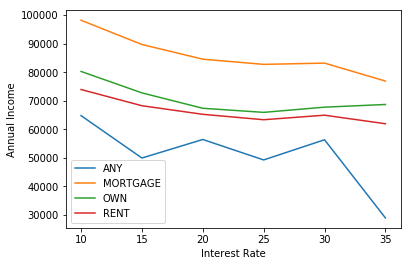

In [60]:
fig, ax = plt.subplots()
new_df.plot(kind='line', ax=ax)
ax.set_xlabel("Interest Rate")
ax.set_ylabel("Annual Income")
plt.show()